***LINEAR REGRESSION - CASE STUDY***

For this notebook, we're going to use the king county house dataset,kc_house_data.csv to **predict the house prices**.
 Make sure it's downloaded and sitting in your working directory. This is a very common dataset for practicing regression analysis and is actually freely available on Kaggle, <a href="https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download">Click here</a>.

You're pretty familiar with the data science pipeline at this point. This project will have the following structure:

 **1. Sourcing and loading**


*   Import relevant libraries
*   Load the data

*  Exploring the data
*   
Choosing an independent variable









**2. Cleaning, transforming, and visualizing**


*   Visualizing correlations





**3.Modeling**

* Train/Test split
* Making a Linear regression model: your first model
* Making a Linear regression model: your second model: Ordinary Least Squares (OLS)
* Making a Linear regression model: your third model: multiple linear regression
* Making a Linear regression model: your fourth model: avoiding redundancy
**4.Evaluating and concluding**

* Reflection
* Which model was best?


# **1.Sourcing and loading**



### 1a.Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt #for visualization needs
import seaborn as sns #Bonus to visualization
sns.set()
from sklearn.metrics import mean_squared_error #The mean_squared_error function computes mean square error,
       #a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
       #Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), …
       #We square each difference (pred(yn) – yn)) ** 2 so that negative and positive values do not cancel each other out.
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn.linear_model import LinearRegression #Machine learning algorithm(linear model)used for regression purposes.
from sklearn import linear_model, preprocessing #The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw
            #feature vectors into a representation that is more suitable for the downstream estimators.
            #Normalization, Scaling,  Encoding categorical features,Discretization, Custom transformers etc.

### 1b.Load the data

In [2]:
#load the data
house_data = pd.read_csv('kc_house_data (1).csv')

### 1c. Exploring the data

In [3]:
# Check out its appearance.
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Another very useful method to call on a recently imported dataset is .info(). Call it here to get a good
# overview of the data
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# let's check the dimensions of the dataset
house_data.shape
print("There are:", house_data.shape[0], 'rows.')
print("There are:", house_data.shape[1], 'columns.')

There are: 21613 rows.
There are: 21 columns.


### 1d. Choosing an independent variable
We now need to pick an independent variable for our regression analysis: a variable whose values we will used to predict the prices..
Before that we'll drop some discrete (categorical) data which does'nt contribute that much to the regression analysis.

```
# This is formatted as code
```




In [6]:
#extract all the label names
house_data.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [7]:
#let us check the correlation between pairs in the dataset.
#Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other.
#We can call the .corr() method on our house data to look at all the correlations between our variables. As the documentation shows, the default correlation coefficient is the Pearson correlation coefficient but other coefficients can be plugged in as parameters.
#Remember, the Pearson correlation coefficient shows us how close to a straight line the data-points fall, and is a number between -1 and 1.
house_data.corr()

<ipython-input-7-1f9cdce4f989>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_data.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [8]:
house = house_data.drop(['id', 'date','floors','condition','grade','yr_built'	,'yr_renovated',	'zipcode'	, 'lat', 'long'],axis =1)

In [9]:
house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.266369,0.397293,0.605567,0.323816,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,-0.006582,0.079532,0.477600,0.303093,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.063744,0.187737,0.685342,0.283770,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.103818,0.284611,0.876597,0.435043,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,0.021604,0.074710,0.183512,0.015286,0.144608,0.718557
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,1.000000,0.401857,0.072075,0.080588,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.401857,1.000000,0.167649,0.276947,0.280439,0.072575
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.072075,0.167649,1.000000,-0.051943,0.731870,0.194050
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,0.080588,0.276947,-0.051943,1.000000,0.200355,0.017276
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.144608,0.086463,0.280439,0.731870,0.200355,1.000000,0.183192


 it seems like** sqft_living** might be a great option for a independent variable. Let's go for that.
 So if we're going for sqft_living as our independent variable, what we now want to get is an idea of which variables are related interestingly to that independent variable.



In [10]:
house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.266369,0.397293,0.605567,0.323816,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,-0.006582,0.079532,0.477600,0.303093,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.063744,0.187737,0.685342,0.283770,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.103818,0.284611,0.876597,0.435043,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,0.021604,0.074710,0.183512,0.015286,0.144608,0.718557
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,1.000000,0.401857,0.072075,0.080588,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.401857,1.000000,0.167649,0.276947,0.280439,0.072575
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.072075,0.167649,1.000000,-0.051943,0.731870,0.194050
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,0.080588,0.276947,-0.051943,1.000000,0.200355,0.017276
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.144608,0.086463,0.280439,0.731870,0.200355,1.000000,0.183192


Ok - you might be thinking, but wouldn't it be nice if we visualized these relationships? It's hard to get a picture of the correlations between the variables without anything visual.

Very true, and this brings us to the next section

# 2. Cleaning, Transforming, and Visualizing

### 2a. Visualizing correlations
The heading of this stage of the data science pipeline ('Cleaning, Transforming, and Visualizing') doesn't imply that we have to do all of those operations in that order. Sometimes (and this is a case in point) our data is already relatively clean, and the priority is to do some visualization. Normally, however, our data is less sterile, and we have to do some cleaning and transforming first prior to visualizing.

Now that we've chosen **sqft_living** as our independent variable for regression analysis, we can begin by plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

<Figure size 8000x8000 with 0 Axes>

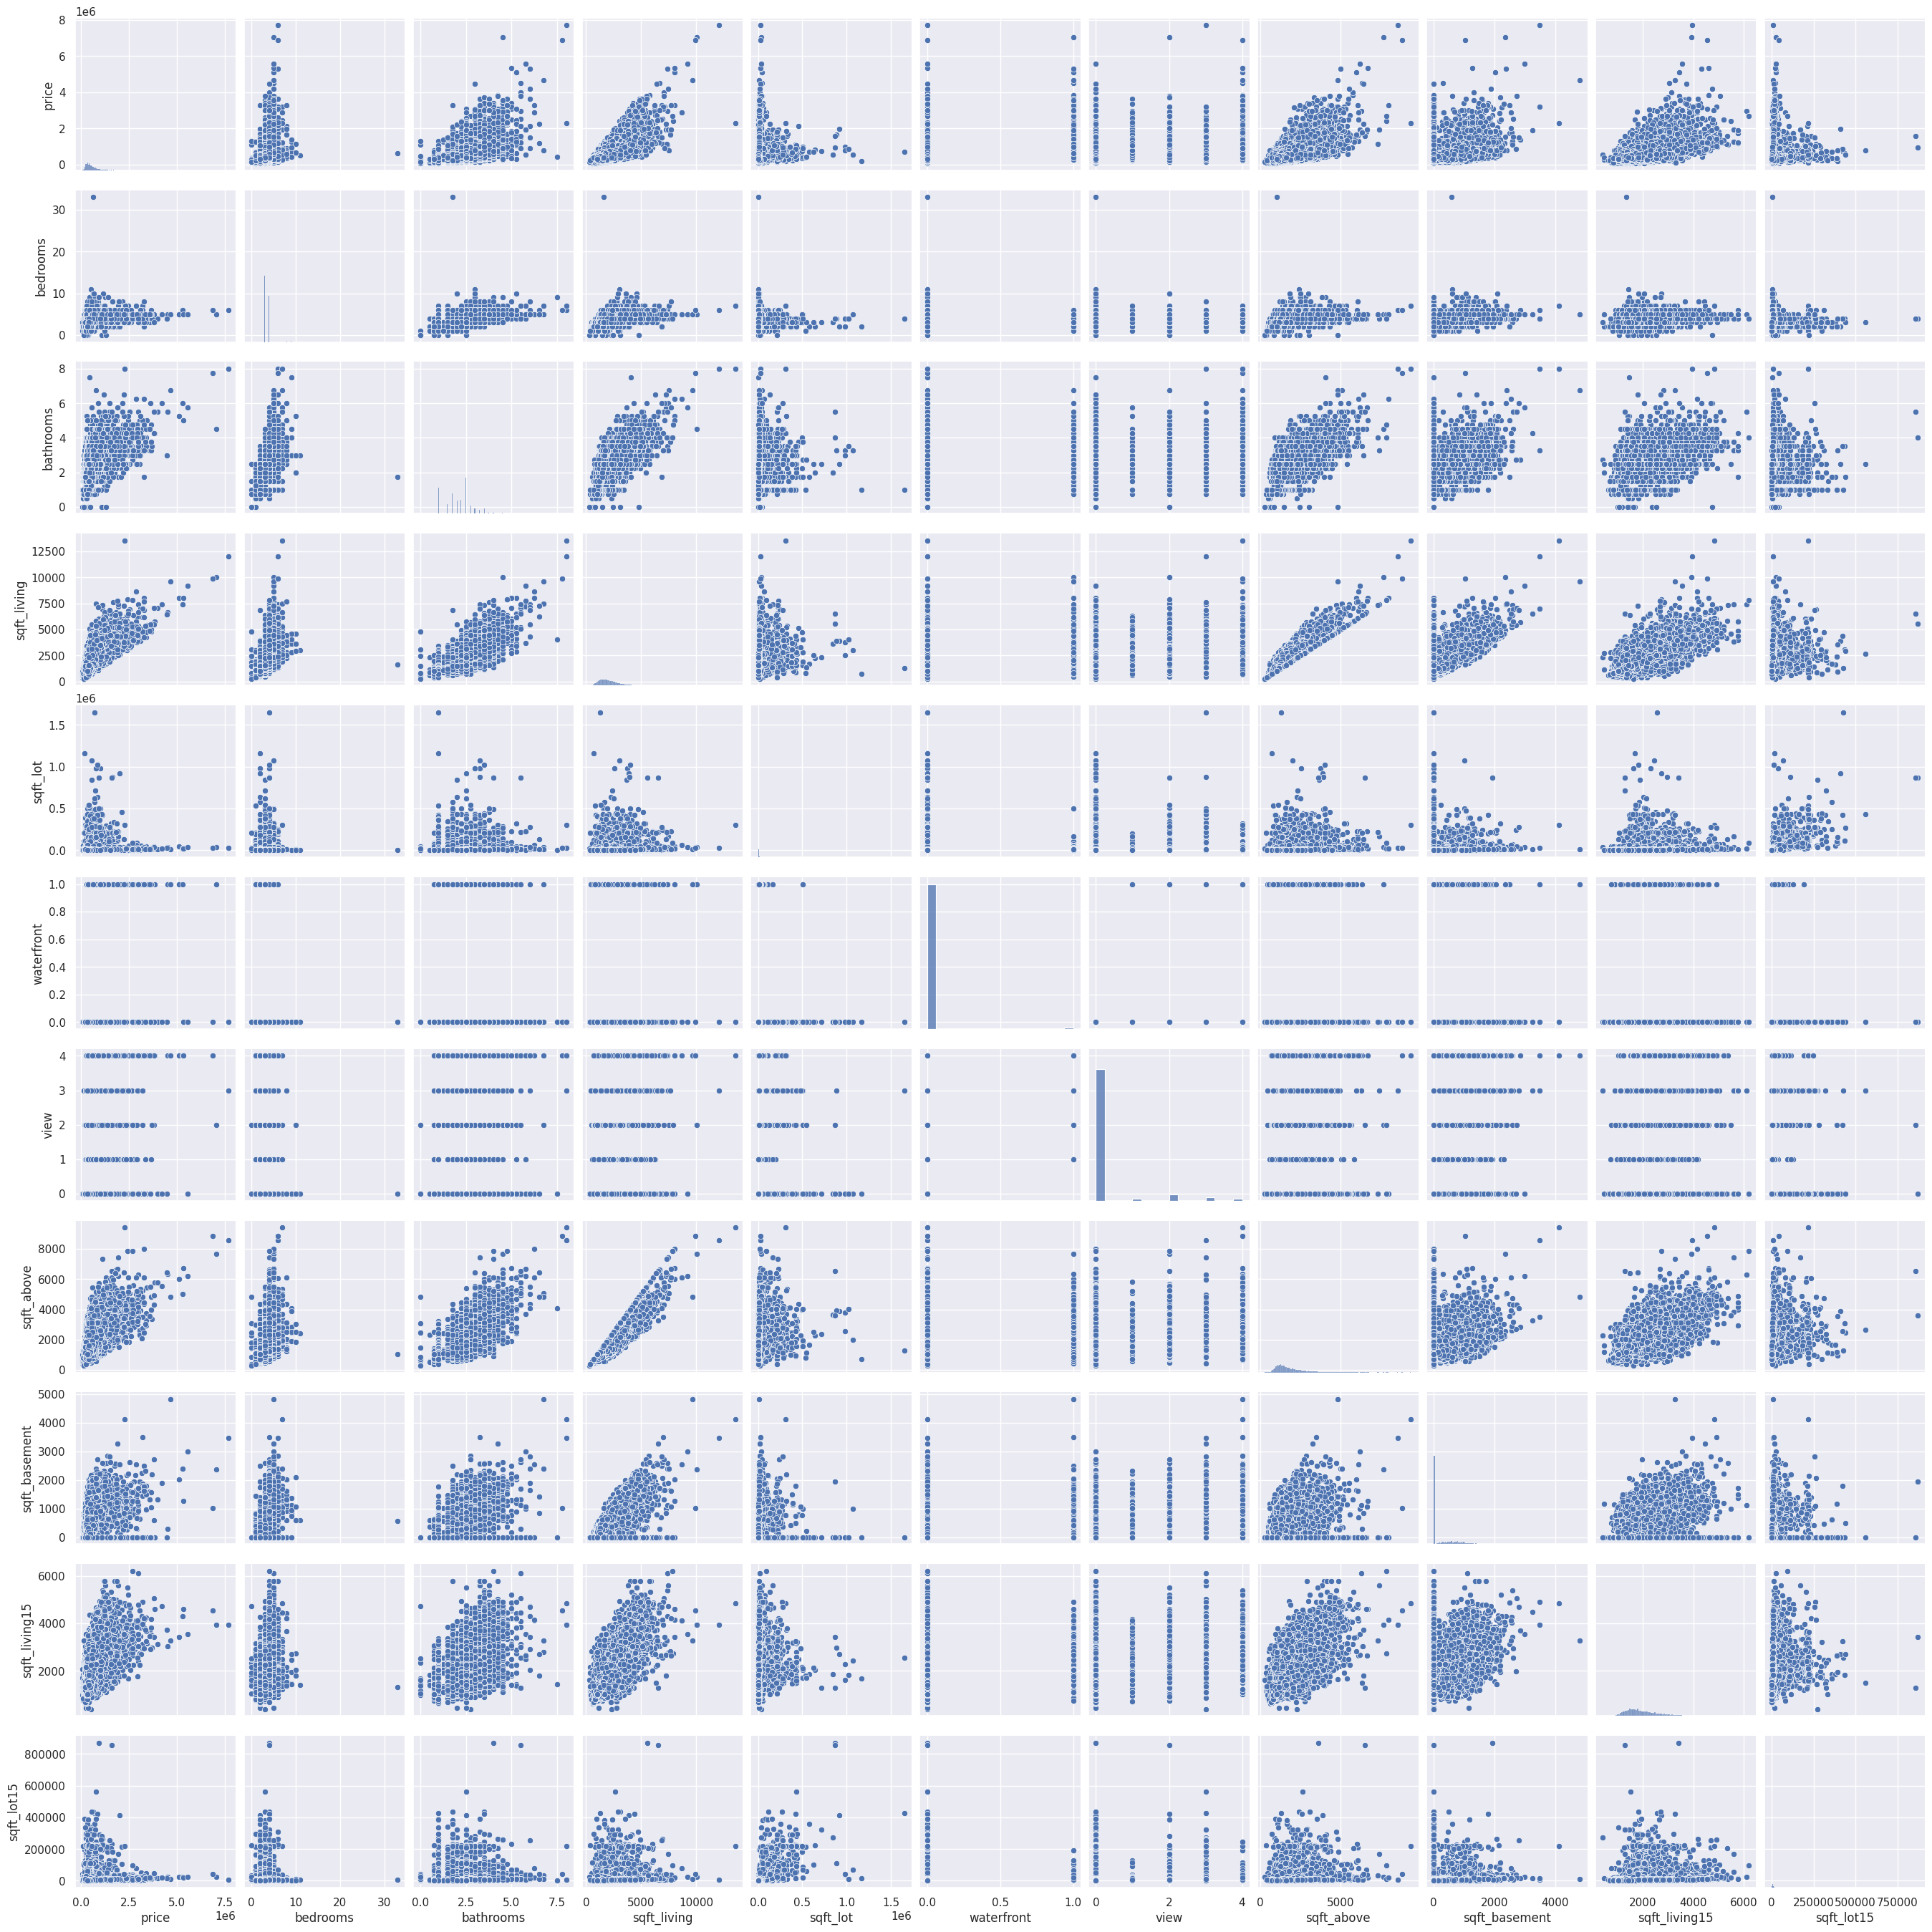

In [11]:
# Make a pairplot of the house data
plt.figure(figsize=(80,80))
sns.pairplot(house)

If you've never executed your own Seaborn pairplot before, just take a moment to look at the output. They certainly output a lot of information at once. Sqft_living is available on the fourth row for your reference.

Here's a couple things you might have noticed:

* a given cell value represents the correlation that exists  between two variables
* on the diagonal, you can see a bunch of histograms. This is because pairplotting the variables with themselves would be pointless, so the pairplot() method instead makes histograms to show the distributions of those variables' values. This allows us to quickly see the shape of each variable's values.
* the plots for the quality variable form horizontal bands, due to the fact that it's a discrete variable. We were certainly right in not pursuing a regression analysis of this variable.
* So we now have called the .corr() method, and the .pairplot() Seaborn method, on our house data. Both have flaws. Happily, we can get the best of both worlds with a heatmap

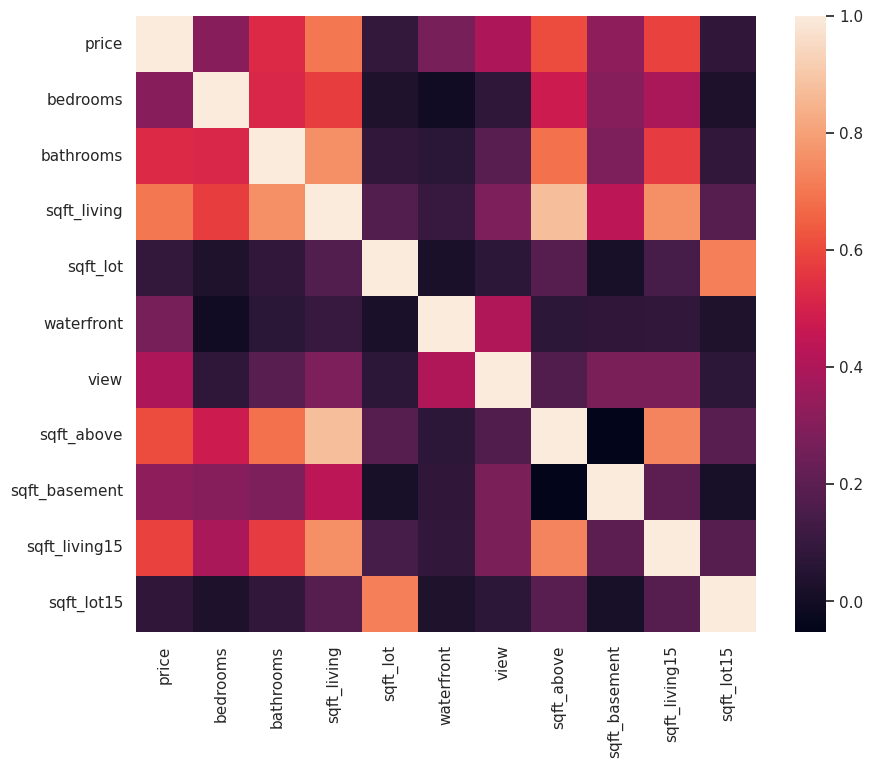

In [12]:
# Make a heatmap of the data
plt.figure(figsize=(10,8))
sns.heatmap(house.corr());

There is a relatively strong correlation between the sqft_living and price variables respectively. In the next code block, call the scatterplot() method on our sns object. Make the x-axis parameter 'sqft_living', the y-axis parameter 'price', and the third parameter specify our house dataset.

<Axes: xlabel='sqft_living', ylabel='price'>

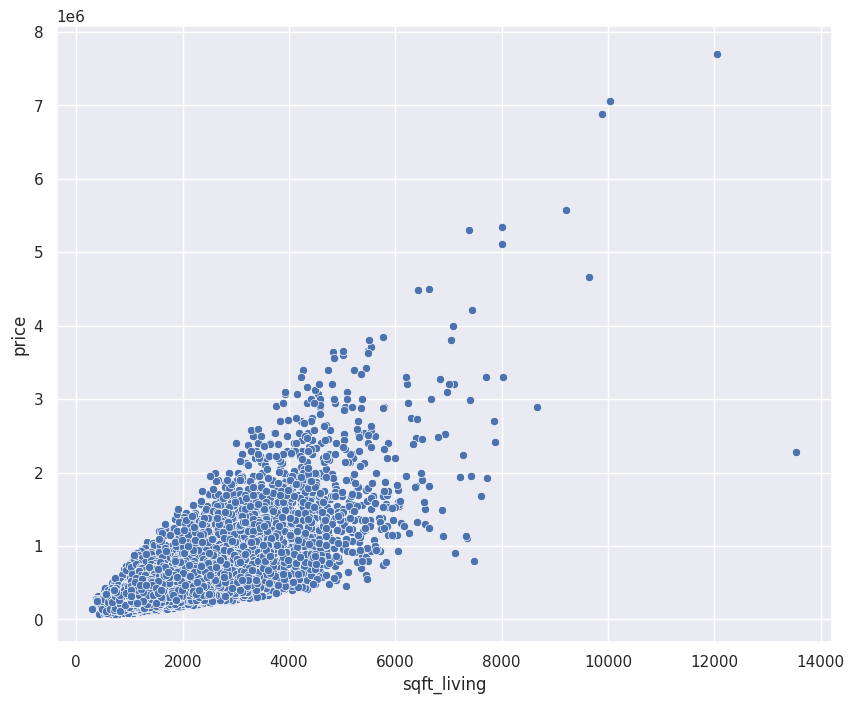

In [13]:
# Plot sqft_living against price
plt.figure(figsize=(10,8))
sns.scatterplot(x='sqft_living', y='price', data=house)

We can see a positive correlation, and quite a steep one. There are some outliers, but as a whole, there is a steep looking line that looks like it ought to be drawn.

<Axes: xlabel='sqft_living', ylabel='price'>

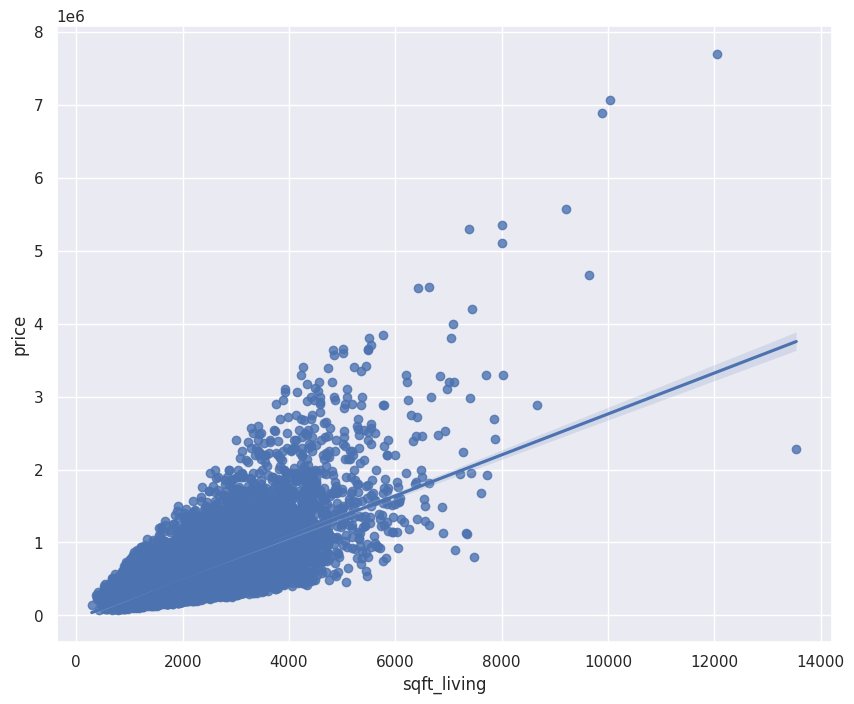

In [14]:
# Call the regplot method on your sns object, with parameters: x = 'sqft_living', y = 'price'
plt.figure(figsize=(10,8))
sns.regplot(x='sqft_living', y='price', data=house)

The line of best fit matches the overall shape of the data, but it's clear that there are some points that deviate from the line, rather than all clustering close.

Let's see if we can predict fixed acidity based on density using linear regression.

# 3. Modeling

### 3a. Train/Test Split

While this dataset is super clean, and hence doesn't require much for analysis, we still need to split our dataset into a test set and a training set.
To be sure, for our first model, we're only going to focus on two variables: sqft_living as our independent variable, and price as our sole dependent predicted variable.

We'll be using <a href="https://scikit-learn.org/stable/">Scikit-learn</a> here. Don't worry if not all of the syntax makes sense; just follow the rationale for what we're doing.

In [15]:
# Subsetting our data into our dependent and independent variables.
x = house[['sqft_living']]
y = house[['price']]
#splitting our data for training and testing.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [16]:
# We now want to check the shape of the x_train, y_train, x_test and y_test to make sure the dimensions are right.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 1)
(4323, 1)
(17290, 1)
(4323, 1)


### 3b. Making a Linear Regression model: our first model

 Sklearn has a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression()</a> function built into the linear_model module. We'll be using that to make our regression model.

In [17]:
model_1 = LinearRegression()
#training our data
model_1.fit(x_train,y_train)

LinearRegression()

In [18]:
# Evaluate the model          # r square Coefficient
model_1.score(x_train, y_train)

0.49238383875829517

The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 50% of the variation from the mean. There's more work to do!

In [19]:
# Use the model to make predictions about our test data
y_pred =model_1.predict(x_test)

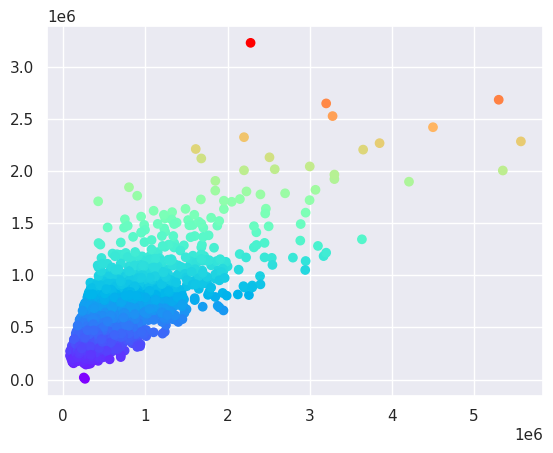

In [31]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test,y_pred,c = y_pred,cmap ='rainbow' )

The above scatterplot represents how well the predictions match the actual results.

Along the x-axis, we have the actual price, and along the y-axis we have the predicted value for the price.

There is a visible positive correlation, as the model has not been totally unsuccesful, but it's clear that it is not maximally accurate.

Let's build a similar model using a different package, to see if we get a better result that way.

### 3c. Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [21]:
# Create the test and train sets. Here, we do things slightly differently.
# We make the explanatory variable x1 as before.
x1 = house[["sqft_living"]]

# But here, reassign x by adding a constant to it. This is required for Ordinary Least Squares Regression.
# Further explanation of this can be found here:
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
x = sm.add_constant(x1)

In [22]:
# The rest of the preparation is as before.
y = house[["price"]]


# Split the data using train_test_split()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 125)

In [23]:
# Create the model
model_2= sm.OLS(y_train, x_train)

# Fit the model with fit()
results_2= model_2.fit()

In [24]:
# Evaluate the model with .summary()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.690e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:36:07   Log-Likelihood:            -2.3998e+05
No. Observations:               17290   AIC:                         4.800e+05
Df Residuals:                   17288   BIC:                         4.800e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.191e+04   4875.918     -8.594      0.000   -5.15e+04   -3.23e+04
sqft_living   279.3992      2.149    130.011      0.000     275.187     283.612
==============================================================================
Omnibus:                    12063.574   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           491323.975
Skew:                           2.858   Prob(JB):                         0.00
Kurtosis:                      28.482   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

One of the great things about Statsmodels (sm) is that you get so much information from the summary() method.

There are lots of values here, whose meanings you can explore at your leisure, but here's one of the most important: the R-squared score is 0.49, the same as what it was with the previous model. This makes perfect sense.It's the same value as the score from sklearn, because they've both used the same algorithm on the same data.

Here's a useful link you can check out if you have the time: https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

To get a better predictive model, we should use more than one variable.

### 3d. Making a Linear Regression model: our third model: multiple linear regression

Including more than one explanotary variable as the independent variables is known as **Multiple Linear Regression**

In [25]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [26]:
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except labels having categorical values)
X = house.drop(['price','bedrooms','bathrooms','view'],axis = 1)
y = house['price']
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 125)

In [27]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
model_3 = sm.OLS(y_train, x_train)

# Fit the model
results_3 = model_3.fit()

In [28]:
# Evaluate the model
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                          1.581e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):                        0.00
Time:                        18:36:07   Log-Likelihood:                     -2.2433e+05
No. Observations:               16209   AIC:                                  4.487e+05
Df Residuals:                   16203   BIC:                                  4.487e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     160.4583      2.258     71.050      0.000     156.032     164.885
sqft_lot          0.0875      0.074      1.183      0.237      -0.058       0.233
waterfront     8.031e+05   2.36e+04     34.023      0.000    7.57e+05    8.49e+05
sqft_above       68.3763      2.460     27.792      0.000      63.554      73.199
sqft_basement    92.0819      3.011     30.587      0.000      86.181      97.983
sqft_living15    34.0740      3.641      9.357      0.000      26.936      41.211
sqft_lot15       -0.7383      0.105     -7.036      0.000      -0.944      -0.533
==============================================================================
Omnibus:                    11745.869   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           591485.913
Skew:                           2.955   Prob(JB):                         0.00
Kurtosis:                      31.998   Cond. No.                     9.42e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.29e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The R-Squared score shows a big improvement - our first model predicted only around 50% of the variation, but now we are predicting 85%!

In [29]:
# Use our new model to make predictions
y_pred = results_3.predict(x_test)

Text(0, 0.5, 'Predicted')

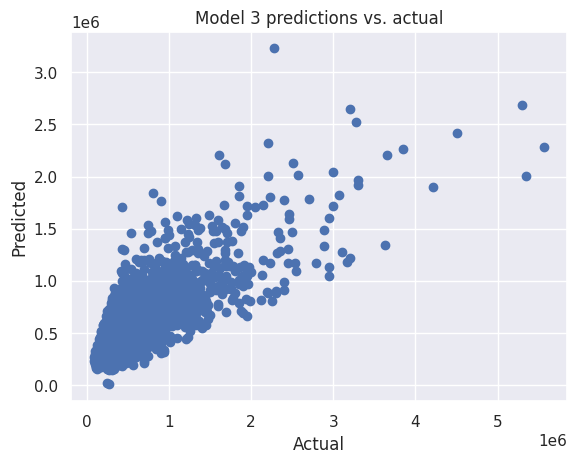

In [32]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Label it nicely
plt.title("Model 3 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

We've now got a much closer match between our data and our predictions, and we can see that the shape of the data points is much more similar to the 45 degree line.

In [34]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

### 3e. Making a Linear Regression model: our fourth model: avoiding redundancy

We can also see from our early heat map that sqft_above and sqft_living15 are both correlated with sqft_living. We can make a model that ignores those two variables and just uses sqft_living, in an attempt to remove redundancy from our model.

In [69]:
# Create test and train datasets
# Include the remaining six columns as predictors
X1 = house[['bedrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_basement',
       'sqft_lot15']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X1)

y = house[["price"]]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 125)

In [70]:
# Create the fifth model
model_4 = sm.OLS(y_train, X_train)

# Fit the model
results_4= model_4.fit()

# Evaluate the model
results_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3169.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:19:37   Log-Likelihood:            -2.2416e+05
No. Observations:               16209   AIC:                         4.483e+05
Df Residuals:                   16202   BIC:                         4.484e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.077e+04   7352.640     10.985      0.000    6.64e+04    9.52e+04
bedrooms      -5.083e+04   2544.389    -19.977      0.000   -5.58e+04   -4.58e+04
sqft_living     302.8092      2.805    107.934      0.000     297.310     308.308
sqft_lot         -0.0336      0.073     -0.459      0.647      -0.177       0.110
waterfront     7.607e+05   2.34e+04     32.448      0.000    7.15e+05    8.07e+05
sqft_basement    14.7151      4.857      3.030      0.002       5.195      24.235
sqft_lot15       -0.7085      0.104     -6.836      0.000      -0.912      -0.505
==============================================================================
Omnibus:                     9980.795   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           335646.899
Skew:                           2.422   Prob(JB):                         0.00
Kurtosis:                      24.760   Cond. No.                     5.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusions

model_3 performed best in all other models. As it was showing a much closer match between our real data and our predicted values. We had data points that were more similar to the red line. Also, the R-square value for model_3 was good enough to consider this Model. model_4 is also good and acceptable because of its fewer numbers of variables which made a model easily understandable.